In [5]:
import json
import pandas as pd
import seaborn as sns
path=''
result_path='./'

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [6]:
f = 'intent_report.json'

with open(path+ result_path+ f) as json_file:
    results  = json.load(json_file)
    

In [7]:
results

{'pt_greeting_how_are_you': {'precision': 0.9705882352941176,
  'recall': 0.9166666666666666,
  'f1-score': 0.9428571428571428,
  'support': 36,
  'confused_with': {'pt_greeting_hello': 3}},
 'pt_bot_availability': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 34,
  'confused_with': {}},
 'pt_comment_negative': {'precision': 0.9069767441860465,
  'recall': 0.8863636363636364,
  'f1-score': 0.896551724137931,
  'support': 44,
  'confused_with': {'pt_comment_offense': 3, 'pt_bot_capabilities': 1}},
 'pt_prevention_entering_home': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 6,
  'confused_with': {}},
 'pt_cc_chicken_egg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 37,
  'confused_with': {}},
 'pt_bot_goal': {'precision': 1.0,
  'recall': 0.9666666666666667,
  'f1-score': 0.983050847457627,
  'support': 30,
  'confused_with': {'pt_bot_capabilities': 1}},
 'pt_user_particles': {'precision': 1.0,
  'recall': 1.0,
  'f1-sc

In [8]:
metric_lst=[]
confused_lst=[]
accuracy = results['accuracy']
averages_lst = []

for k in ['macro avg', 'weighted avg']:
    v=results[k]
    averages_lst.append(['macro avg', v['precision'], v['recall'], v['f1-score'], v['support']])


for k, v in results.items():
    if k not in ['accuracy','macro avg', 'weighted avg']:
        metric_lst.append([k, v['precision'], v['recall'], v['f1-score'], v['support']])
        for i, c in v['confused_with'].items():
            confused_lst.append([k, i, c])


In [9]:
print('accuracy', accuracy)

accuracy 0.992436974789916


In [10]:
averages = pd.DataFrame(averages_lst, columns = ['intent', 'precision', 'recall', 'f1-score', 'support'])
metrics = pd.DataFrame(metric_lst, columns = ['intent', 'precision', 'recall', 'f1-score', 'support'])
confusion = pd.DataFrame(confused_lst, columns = ['intent', 'confused_with', 'cnt'])

In [11]:
averages

,intent,precision,recall,f1-score,support
0,macro avg,0.993951,0.992345,0.993028,5950
1,macro avg,0.992606,0.992437,0.992425,5950


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

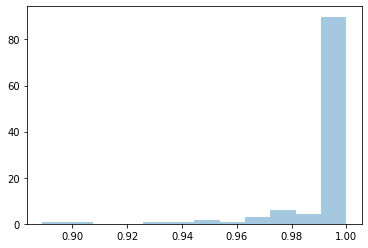

In [15]:
sns.distplot(metrics.precision)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

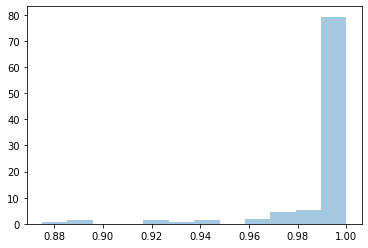

In [16]:
sns.distplot(metrics.recall)

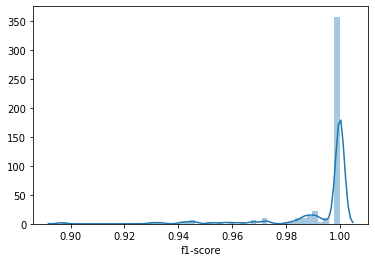

In [17]:
sns.distplot(metrics['f1-score'])

In [18]:
metrics [metrics.recall<0.5].sort_values('support',ascending=False)

,intent,precision,recall,f1-score,support


In [57]:
confusion.sort_values('cnt', ascending=False)

,intent,confused_with,cnt
27,tr_userfeeling_negative,tr_user_angry,25
84,tr_user_angry,tr_userfeeling_negative,23
36,tr_quarantine_how_it_works,tr_quarantine_general,16
136,tr_quarantine_general,tr_quarantine_how_it_works,16
298,tr_cc_religion,tr_cc_philosophical,14
192,tr_bot_sexual,tr_comment_offense,12
51,tr_cc_philosophical,tr_cc_religion,11
86,tr_germany_current_situation,tr_current_situation,10
256,tr_comment_offense,tr_bot_sexual,10
187,tr_comment_smart,tr_comment_positive,9


In [19]:
confusion.groupby('intent').cnt.sum().reset_index().sort_values('cnt', ascending=False)

,intent,cnt
25,pt_vocative_thank_you,6
8,pt_comment_negative,4
9,pt_comment_offense,4
16,pt_greeting_how_are_you,3
4,pt_bot_personality,2
7,pt_cc_philosophical,2
21,pt_user_laugh,2
1,pt_bot_capabilities,2
0,pt_bot_appearance,1
24,pt_vocative_no,1
